In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy

In [2]:
# Define paths to your data
cat_folder = 'Cat'
dog_folder = 'Dog'

In [3]:
# Function to load and resize images
def load_images_from_folder(folder, label, img_size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = Image.open(img_path).convert('RGB')
            img = img.resize(img_size)
            img_array = np.array(img)
            images.append(img_array)
            labels.append([label])  # Ensure labels are shaped (1,)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    return np.array(images), np.array(labels)

In [4]:
# Load and resize images from both folders
cat_images, cat_labels = load_images_from_folder(cat_folder, label=0)
dog_images, dog_labels = load_images_from_folder(dog_folder, label=1)

# Combine cat and dog data
X = np.concatenate((cat_images, dog_images), axis=0)
Y = np.concatenate((cat_labels, dog_labels), axis=0)

# Split into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=20000, test_size=4995, stratify=Y)

# Final shape check
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

Error loading image Cat/.DS_Store: cannot identify image file '/Users/huzaifahtariqahmed/Documents/University/Summer 2024/Binary Image Class Model/Custom-Binary-Image-Classifier/Cat/.DS_Store'


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Error loading image Dog/.DS_Store: cannot identify image file '/Users/huzaifahtariqahmed/Documents/University/Summer 2024/Binary Image Class Model/Custom-Binary-Image-Classifier/Dog/.DS_Store'
Error loading image Dog/11702.jpg: cannot identify image file '/Users/huzaifahtariqahmed/Documents/University/Summer 2024/Binary Image Class Model/Custom-Binary-Image-Classifier/Dog/11702.jpg'
X_train shape: (20000, 128, 128, 3)
X_test shape: (4995, 128, 128, 3)
Y_train shape: (20000, 1)
Y_test shape: (4995, 1)


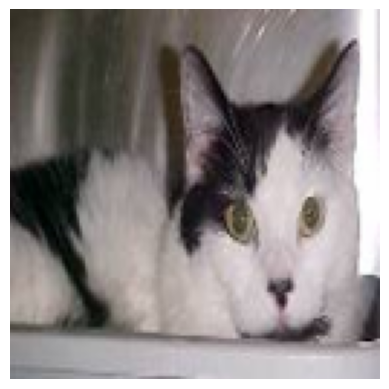

In [6]:
# Example of a picture
index = 2000 # Choose the index of the image you want to display
plt.imshow(X_train[index])
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

In [7]:
# YOUR CODE STARTS HERE
m_train = X_train.shape[0]
m_test = X_test.shape[0]
num_px = X_train.shape[1]
# YOUR CODE ENDS HERE

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(Y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(Y_test.shape))

Number of training examples: m_train = 20000
Number of testing examples: m_test = 4995
Height/Width of each image: num_px = 128
Each image is of size: (128, 128, 3)
train_set_x shape: (20000, 128, 128, 3)
train_set_y shape: (20000, 1)
test_set_x shape: (4995, 128, 128, 3)
test_set_y shape: (4995, 1)


In [18]:
# Flatten the images (each image is 32x32x3, and needs to be flattened to a 3072-length vector)
X_train_flatten = X_train.reshape(X_train.shape[0], -1).T
X_test_flatten = X_test.reshape(X_test.shape[0], -1).T

In [19]:
Y_train = Y_train.T
Y_test = Y_test.T

In [20]:
print ("train_set_x_flatten shape: " + str(X_train_flatten.shape))
print ("train_set_y shape: " + str(Y_train.shape))
print ("test_set_x_flatten shape: " + str(X_test_flatten.shape))
print ("test_set_y shape: " + str(Y_test.shape))

train_set_x_flatten shape: (49152, 20000)
train_set_y shape: (1, 20000)
test_set_x_flatten shape: (49152, 4995)
test_set_y shape: (1, 4995)


In [21]:
train_set_x = X_train_flatten / 255.
test_set_x = X_test_flatten / 255.

In [22]:
def sigmoid(z):
    
    s = 1/(1+np.exp(-z))
    
    return s

In [23]:
def initialize_with_zeros(dim):
    
    w = np.zeros((dim,1))
    b = 0.0

    return w, b

In [24]:
def propagate(w, b, X, Y):
    
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X) + b)
    cost = (-1/m)*np.sum(np.dot(Y,np.log(A).T) + np.dot((np.subtract(1,Y)),np.log(np.subtract(1,A)).T))
    
    dw = (1/m)*np.dot(X,np.subtract(A,Y).T)
    db = (1/m)*np.sum(np.subtract(A,Y))

    cost = np.squeeze(np.array(cost))

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [25]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        a
        if i % 100 == 0:
            costs.append(cost)
        
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [26]:
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T,X)+b)

    for i in range(A.shape[1]):

        Y_prediction[0, :] = (A[0, :] > 0.5).astype(int)
    
    return Y_prediction

In [27]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):

    w, b = initialize_with_zeros(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = params["w"]
    b = params["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
logistic_regression_model = model(train_set_x, Y_train, test_set_x, Y_test, num_iterations=5000, learning_rate=0.03, print_cost=True)

y = 1, you predicted that it is a "0" picture.


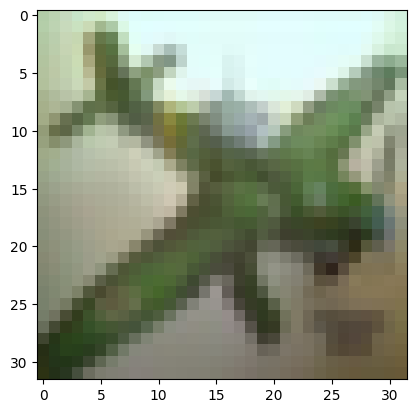

In [20]:
index = 27
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(Y_test[0,index]) + ", you predicted that it is a \"" + str(int(logistic_regression_model['Y_prediction_test'][0,index])) +  "\" picture.")